In [1]:
!pip install geopandas


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os

# 查看 "MyDrive" 目录中的文件和文件夹
my_drive_path = '/content/drive/MyDrive'
files = os.listdir(my_drive_path)

# 打印文件列表
for file in files:
    print(file)


weatherAUS.csv
Colab Notebooks
Qianwei Yu | qy824@nyu.edu.gslides
presentation.gslides
Cross culture fusion.gslides
Copy of Outreach Template.docx
EAP 101 Qianwei Yu (Amy)
N19816638.jpg
PeiQuan Feng(Glen pf2208)'s summary on an article about cultural appropriation.mp4
历保
Leasing team.mov
Qianwei Yu, Precalculus, 2022 Fall
Copy of Course Plan.gsheet
ED3A3_STATISTICAL_REPORT_G9.docx
Copy of wine_data.csv
Fall 2022 Business Analytics
assignment5_data.csv
Copy of emotion_train_text.txt
Copy of emotion_train_labels.txt
Copy of emotion_test_text.txt
Copy of emotion_test_labels.txt
Copy of NLP lab template.ipynb
Shanghai previous year data.csv
Paris historical data with FastPass.csv
Copy of regression.ipynb
Copy of vehicle_purchase_data.csv
Copy of output_dataset.csv
Copy of Copy of NLP lab template.ipynb
paris_data.csv
Shanghai_data.csv
Paris_data.csv
output_data.csv
Cluster final.ipynb
Qianwei‘s ics final project code
Python chat system: GUI & Battle City Game & Secure Messaging.gslides
Dat

In [7]:
import geopandas as gpd
#shapefile_path = '/content/drive/MyDrive/上海市_公园广场-点.shp'

# 使用 GeoPandas 读取 Shapefile
#gdf = gpd.read_file(shapefile_path)

In [ ]:
# 读取 Shapefile 文件
#gdf = gpd.read_file(shapefile_path)

# 将数据保存为 GeoJSON 到 Google Drive
#output_geojson_path = '/content/drive/MyDrive/上海市_公园广场-点.geojson'
#gdf.to_file(output_geojson_path, driver="GeoJSON")

# 输出保存路径，确保文件已保存
#print(f"GeoJSON 文件已保存至: {output_geojson_path}")

GeoJSON 文件已保存至: /content/drive/MyDrive/上海市_公园广场-点.geojson


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [4]:
try:
    gdf = gpd.read_file("/content/drive/MyDrive/filtered_park_df.geojson", encoding='utf-8')
except UnicodeDecodeError:
    gdf = gpd.read_file("/content/drive/MyDrive/filtered_park_df.geojson", encoding='gbk')

# 查看前几行数据
print(gdf.head())

   OBJECTID    osm_id  code fclass   name  Shape_Leng    Shape_Area  \
0        56  39763744  7202   park   人民公园    0.013504  9.854620e-06   
1        57  39961770  7202   park   复兴公园    0.011324  6.920550e-06   
2       129  50258395  7202   park  大观园绿地    0.004629  9.350000e-07   
3       246  58413664  7202   park   None    0.004009  4.514200e-07   
4       247  58413720  7202   park   None    0.005192  9.922400e-07   

                                            geometry  
0  MULTIPOLYGON (((121.47083 31.23446, 121.47125 ...  
1  MULTIPOLYGON (((121.46457 31.22042, 121.46464 ...  
2  MULTIPOLYGON (((121.46866 31.23965, 121.46744 ...  
3  MULTIPOLYGON (((121.47952 31.19812, 121.47822 ...  
4  MULTIPOLYGON (((121.48059 31.19819, 121.48047 ...  


In [8]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# 读取 CSV 文件
csv_file_path = '/content/drive/MyDrive/上海市POI数据.csv'  # 替换为你的文件路径
df = pd.read_csv(csv_file_path)

# 创建空间坐标（Point），将经纬度转换为几何对象
geometry = [Point(xy) for xy in zip(df['经度'], df['纬度'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# 将数据保存为 GeoJSON 格式
geojson_file_path = '/content/drive/MyDrive/上海市POI数据.geojson'  # 保存到Google Drive
gdf.to_file(geojson_file_path, driver="GeoJSON")

# 输出保存路径
print(f"GeoJSON 文件已保存至: {geojson_file_path}")


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


GeoJSON 文件已保存至: /content/drive/MyDrive/上海市POI数据.geojson


In [9]:
import geopandas as gpd
import numpy as np

# 加载口袋公园数据（假设是GeoDataFrame，包含每个公园的位置）
parks = gpd.read_file("/content/drive/MyDrive/filtered_park_df.geojson")

# 加载POI数据（假设每个POI有类别和坐标）
pois = gpd.read_file("/content/drive/MyDrive/上海市POI数据.geojson")
#print(pois.head())

#print(pois['大类'])

In [ ]:
parks

,OBJECTID,osm_id,code,fclass,name,Shape_Leng,Shape_Area,geometry
0,56,39763744,7202,park,人民公园,0.013504,9.854620e-06,"MULTIPOLYGON (((121.47083 31.23446, 121.47125 ..."
1,57,39961770,7202,park,复兴公园,0.011324,6.920550e-06,"MULTIPOLYGON (((121.46457 31.22042, 121.46464 ..."
2,129,50258395,7202,park,大观园绿地,0.004629,9.350000e-07,"MULTIPOLYGON (((121.46866 31.23965, 121.46744 ..."
3,246,58413664,7202,park,None,0.004009,4.514200e-07,"MULTIPOLYGON (((121.47952 31.19812, 121.47822 ..."
4,247,58413720,7202,park,None,0.005192,9.922400e-07,"MULTIPOLYGON (((121.48059 31.19819, 121.48047 ..."
...,...,...,...,...,...,...,...,...
442,9374,870546906,7202,park,None,0.003493,5.378900e-07,"MULTIPOLYGON (((121.45515 31.1332, 121.45508 3..."
443,9378,870546911,7202,park,None,0.009129,3.280150e-06,"MULTIPOLYGON (((121.45529 31.11205, 121.4553 3..."
444,9886,886526878,7202,park,None,0.011583,1.330440e-06,"MULTIPOLYGON (((121.43203 31.13155, 121.43337 ..."
445,9887,886526879,7202,park,None,0.022343,5.065840e-06,"MULTIPOLYGON (((121.44593 31.13113, 121.43989 ..."


In [ ]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
pois.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
pois

,名称,大类,中类,经度,纬度,省份,地级市,区县,geometry
0,上海南汇嘴大堤豪华酒店,酒店住宿,其他,121.971890,30.881739,上海市,上海市,浦东新区,POINT (975515.687 3427101.955)
1,南汇嘴观海生态公园,旅游景点,公园,121.971697,30.881220,上海市,上海市,浦东新区,POINT (975499.779 3427043.509)
2,南汇嘴观海公园,交通设施,公交站,121.971778,30.882131,上海市,上海市,浦东新区,POINT (975503.019 3427144.997)
3,智选假日豪华酒店,酒店住宿,四星级酒店,121.971603,30.881782,上海市,上海市,浦东新区,POINT (975487.992 3427105.502)
4,专用停车场,交通设施,停车场,121.970921,30.880284,上海市,上海市,浦东新区,POINT (975430.112 3426936.276)
...,...,...,...,...,...,...,...,...,...
875973,捞王锅物料理,餐饮美食,中国菜,121.479831,31.195764,上海市,上海市,黄浦区,POINT (926998.635 3459955.202)
875974,皇浦荟,餐饮美食,中国菜,121.479992,31.196973,上海市,上海市,黄浦区,POINT (927008.549 3460090.008)
875975,隐溪茶馆,餐饮美食,茶座,121.481973,31.197914,上海市,上海市,黄浦区,POINT (927193.307 3460202.118)
875976,1点点,餐饮美食,蛋糕甜品店,121.482656,31.201798,上海市,上海市,黄浦区,POINT (927240.961 3460635.837)


In [10]:
parks= parks.to_crs("EPSG:32650")

# 检查设置后的CRS
print("Updated CRS:", parks.crs)

Updated CRS: EPSG:32650


In [11]:
pois= pois.to_crs("EPSG:32650")

# 检查设置后的CRS
print("Updated CRS:", pois.crs)

Updated CRS: EPSG:32650


In [12]:
# 创建每个公园500米的缓冲区
parks['buffer_500m'] = parks.geometry.buffer(500)  # 500米缓冲区

In [13]:
# 计算每个公园500米缓冲区内的POI类型数量
def calculate_poi_counts(buffer, pois):
    pois_in_buffer = pois[pois.geometry.within(buffer)]  # 找到缓冲区内的POI
    poi_counts = pois_in_buffer.groupby('大类').size()  # 按照POI类型分组统计数量
    return poi_counts.to_dict()  # 返回每个POI类型的数量字典

# 为每个公园计算POI类型数量
parks['poi_counts_500m'] = parks['buffer_500m'].apply(
    lambda buffer: calculate_poi_counts(buffer, pois)
)


In [14]:
parks['poi_counts_500m']

,poi_counts_500m
0,"{'交通设施': 260, '休闲娱乐': 95, '公司企业': 332, '医疗保健':..."
1,"{'交通设施': 160, '休闲娱乐': 110, '公司企业': 160, '医疗保健'..."
2,"{'交通设施': 128, '休闲娱乐': 37, '公司企业': 177, '医疗保健':..."
3,"{'交通设施': 130, '休闲娱乐': 30, '公司企业': 149, '医疗保健':..."
4,"{'交通设施': 131, '休闲娱乐': 33, '公司企业': 170, '医疗保健':..."
...,...
105,"{'交通设施': 79, '休闲娱乐': 25, '公司企业': 82, '医疗保健': 1..."
106,"{'交通设施': 65, '休闲娱乐': 25, '公司企业': 53, '医疗保健': 1..."
107,"{'交通设施': 136, '休闲娱乐': 13, '公司企业': 144, '医疗保健':..."
108,"{'交通设施': 48, '休闲娱乐': 3, '公司企业': 32, '医疗保健': 6,..."


In [15]:
# 计算熵值（POI 多样性）
def calculate_entropy(poi_counts):
    total_pois = sum(poi_counts.values())  # 总POI数量
    if total_pois == 0:
        return 0  # 如果没有POI，返回0
    proportions = np.array(list(poi_counts.values())) / total_pois  # 计算每个POI类型的比例
    entropy = -np.sum(proportions * np.log(proportions))  # 计算熵值
    return entropy

# 应用熵值计算到每个公园
parks['poi_entropy_500m'] = parks['poi_counts_500m'].apply(calculate_entropy)


     OBJECTID  poi_entropy_500m
0          56          2.144317
1          57          2.206376
2         129          2.283983
3         246          2.254954
4         247          2.252107
..        ...               ...
105      5513          2.225537
106      5514          2.192877
107      6469          2.379101
108      9370          2.328584
109     10340          1.880079

[110 rows x 2 columns]


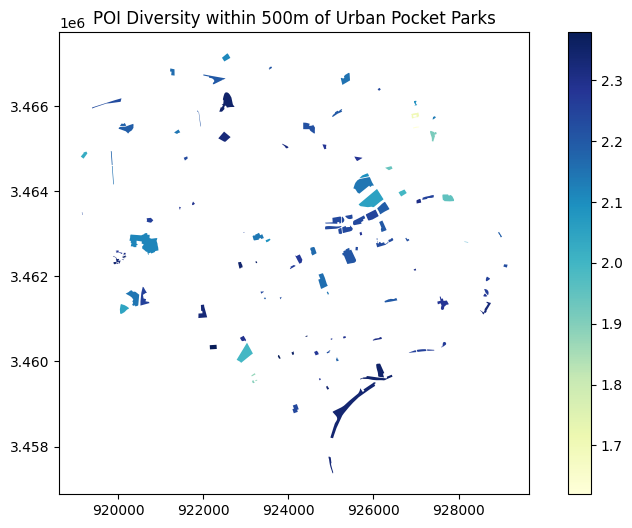

In [16]:
# 输出每个公园的POI多样性（熵值）
print(parks[['OBJECTID', 'poi_entropy_500m']])

# 可视化 POI 多样性分布
import matplotlib.pyplot as plt

# 绘制POI多样性地图，显示每个公园的多样性
parks.plot(column='poi_entropy_500m', cmap='YlGnBu', legend=True, figsize=(10, 6))
plt.title("POI Diversity within 500m of Urban Pocket Parks")
plt.show()


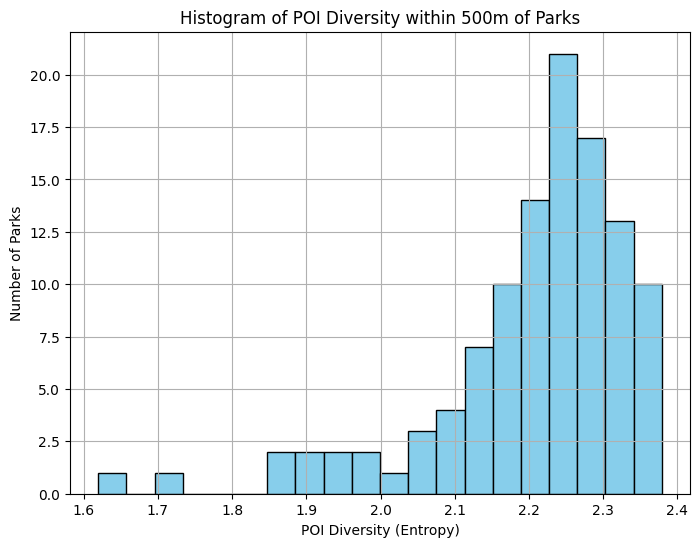

In [17]:
# Plot the histogram of POI diversity
plt.figure(figsize=(8, 6))
plt.hist(parks['poi_entropy_500m'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of POI Diversity within 500m of Parks')
plt.xlabel('POI Diversity (Entropy)')
plt.ylabel('Number of Parks')
plt.grid(True)
plt.show()

In [18]:
parks[['OBJECTID', 'poi_entropy_500m']].to_csv('/content/drive/MyDrive/poi_diversity.csv', index=False)

print("CSV file has been saved.")

CSV file has been saved.
